In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


# Task 1 – Data Loading and data exploration

In [4]:
import pandas as pd
df=pd.read_csv("customers.csv")
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [5]:
#Data Characteristics
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [6]:
#Columns in the Data
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
#Type of Data in the Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Checking for Null Values Again
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#Statisitcal Analysis of Quantitative Columns
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [10]:
#Statisitcal Analysis of Categorical Columns

df.describe(include=object)

Gender
count      200
unique       2
top     Female
freq       112

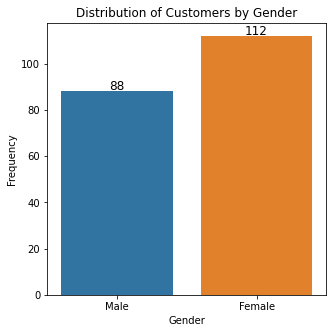

In [11]:
#Frequecy Count of Male and Female Customers

plt.figure(figsize=(5,5))

ax=sns.countplot(x=df["Gender"])

plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend

for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0,5), 
                   textcoords = 'offset points')

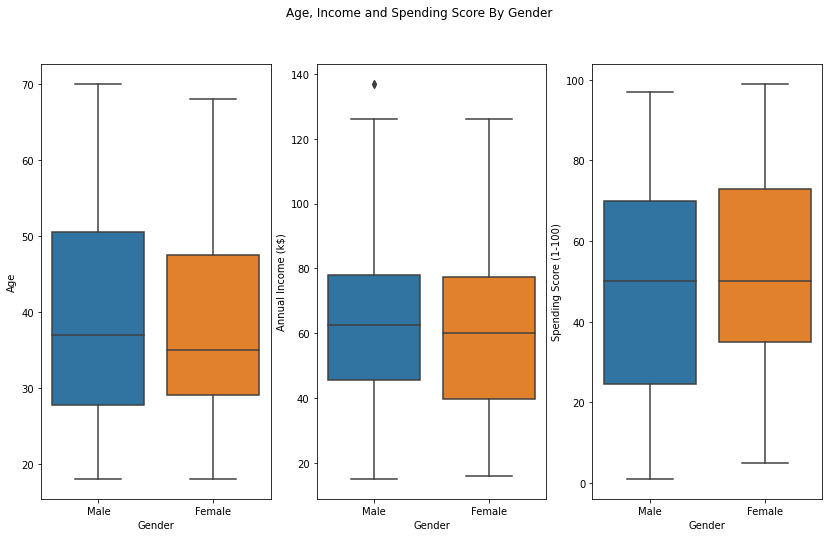

In [12]:
#BOXPLOT for Male and Female Customers for Quantitative Features of the Dataset

fig, ax=plt.subplots(1,3, figsize=(14,8))

plt.suptitle('Age, Income and Spending Score By Gender')

sns.boxplot(y=df['Age'], x=df['Gender'], ax=ax[0])

sns.boxplot(y=df["Annual Income (k$)"], x=df['Gender'], ax=ax[1])

sns.boxplot(y=df["Spending Score (1-100)"], x=df['Gender'], ax=ax[2])

plt.show()

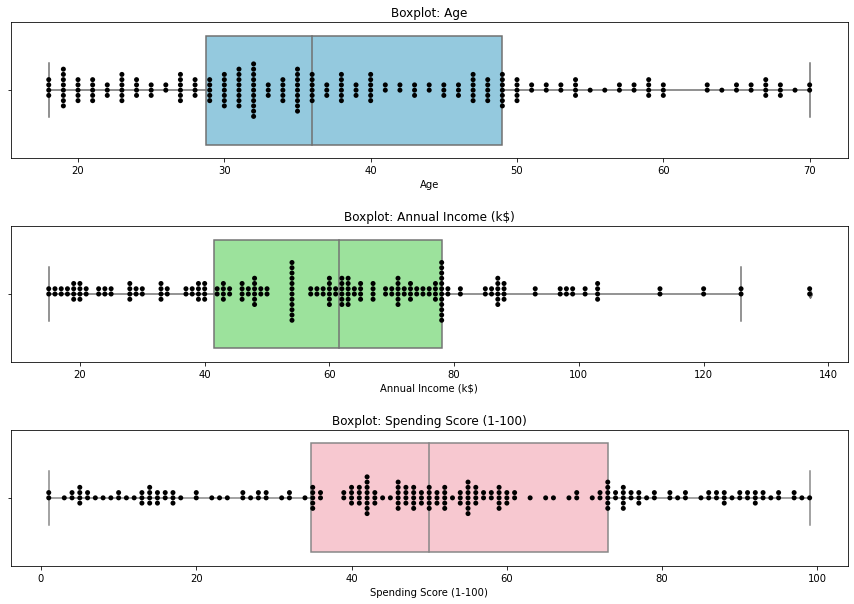

In [13]:
##BOXPLOT for All Customers for Quantitative Features of the Dataset


plt.figure(1 , figsize = (15 , 10))
n=0
color=["skyblue", "lightgreen", "pink"]
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n+=1
    plt.subplot(3 , 1 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.swarmplot(df[x], color="black", hue=df["Gender"])
    sns.boxplot(df[x], color=color[n-1], hue=df["Gender"])
    plt.title(f"Boxplot: {x}")
plt.show()

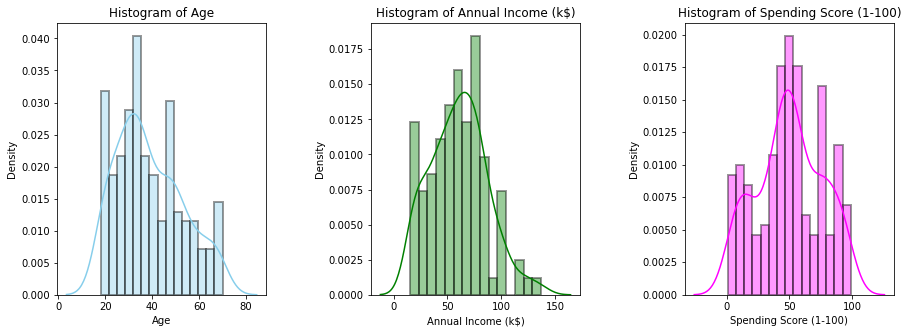

In [14]:
#HISTOGRAM for the Quantitatibe Features of the Dataset

plt.figure(1 , figsize = (15 , 5))
color=["skyblue", "green", "magenta"]
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15, color=color[n-1], hist_kws=dict(edgecolor="black", linewidth=2),)
    plt.title('Histogram of {}'.format(x))
plt.show()

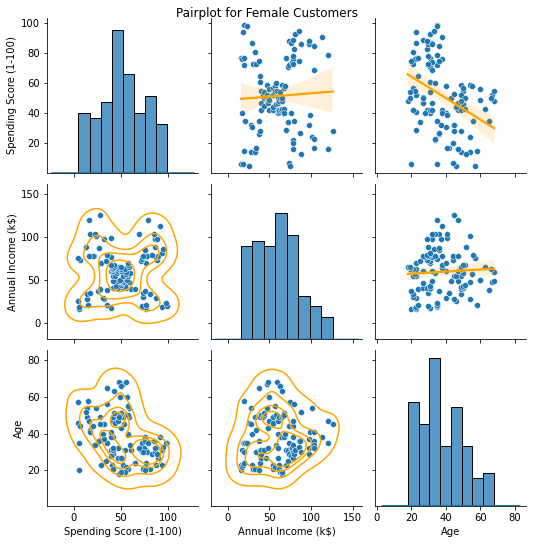

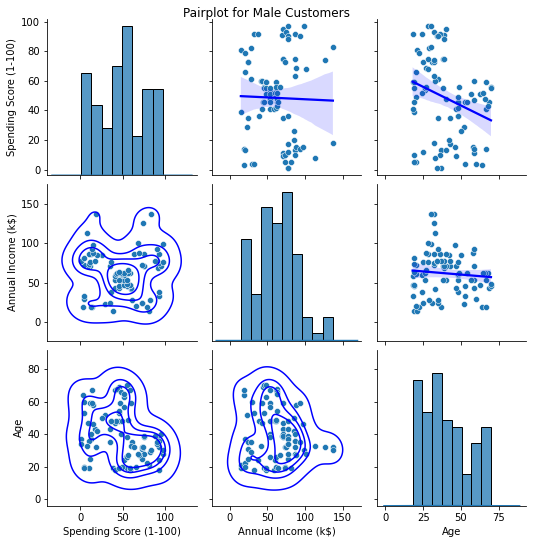

In [15]:
#Pairplot for MALE and FEMALE customers to indentify clusters and correlations

df_female=df[df["Gender"]=="Female"]

df_male=df[df["Gender"]=="Male"]


g=sns.pairplot(df_female, 
             vars = ['Spending Score (1-100)', 
                     'Annual Income (k$)', 
                     'Age'],  
             height =2.5, 
             aspect=1
            )

g.map_lower(sns.kdeplot, levels=5, color="orange")

#g.map_offdiag(sns.scatterplot)

g.map_diag(sns.distplot, hist=True, kde=True, hist_kws={'alpha':0.5})


g.map_upper(sns.regplot, line_kws={"color": "orange"}, scatter=False)


g.fig.suptitle("Pairplot for Female Customers", y=1) # y= some height>1

plt.show()

f=sns.pairplot(df_male, 
             vars = ['Spending Score (1-100)', 
                     'Annual Income (k$)', 
                     'Age'],  
             height =2.5, 
             aspect=1
              )

f.map_lower(sns.kdeplot, levels=5, color="blue")
f.map_diag(sns.kdeplot)
f.map_upper(sns.regplot, line_kws={"color": "blue"}, scatter=False)


f.fig.suptitle("Pairplot for Male Customers", y=1) 

plt.show()

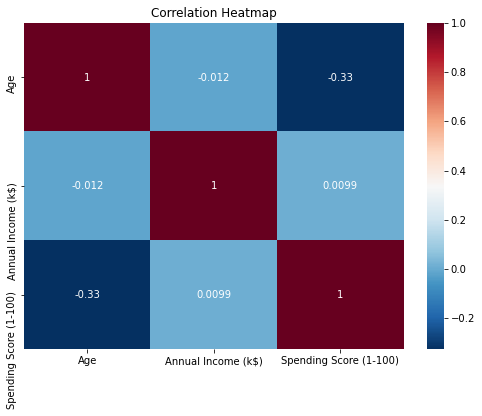

In [16]:
#Correlations
plt.figure(figsize=(8.5, 6))
#mask = np.triu(np.ones_like(df[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']].corr(), dtype=np.bool))
c=sns.heatmap(df[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']].corr(), 
              annot=True,
              cmap='RdBu_r',
              )
c.set_title('Correlation Heatmap');

In [17]:
# 3D visualization of the 3 Quantitative Features in the Dataset

import plotly.express as px

fig = px.scatter_3d(df, x='Annual Income (k$)', z='Spending Score (1-100)', y='Age',
              symbol='Gender', opacity=0.5, color="Gender")
fig.show()

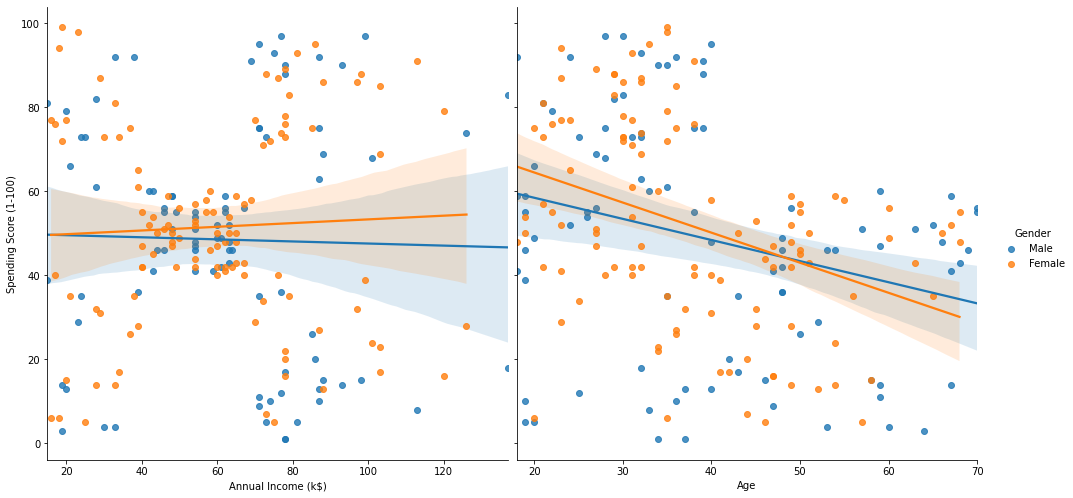

In [18]:
#Pairplot for MALE and FEMALE customers linking Spending Score with Age and Annual Income

sns.pairplot(df, x_vars=['Annual Income (k$)', 'Age'], y_vars=['Spending Score (1-100)'],
             hue="Gender", height=7, aspect=1, kind="reg");



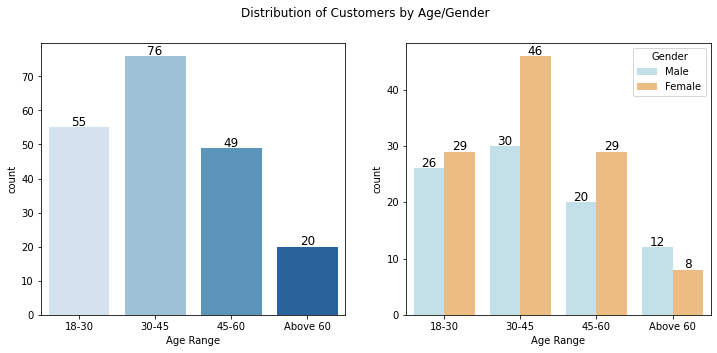

In [19]:
#Visualizing Major Age Groups in the Data Set

# Creating new category
bins = [18,30,45,60,100]
labels = ['18-30', '30-45', '45-60', 'Above 60']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)



fig, ax=plt.subplots(1,2, figsize=(12,5))

plt.suptitle('Distribution of Customers by Age/Gender')


sns.countplot(df['Age Range'], palette="Blues", ax=ax[0])



for p in ax[0].patches:
    ax[0].annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0,5), 
                   textcoords = 'offset points')
    

sns.countplot(df['Age Range'], hue=df["Gender"], palette="RdYlBu_r", ax=ax[1])




for p in ax[1].patches:
    ax[1].annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0,5), 
                   textcoords = 'offset points')
    
    
fig.show()

# Task 2 – Applying Clustering Algorithms

## Pre-processing Steps for Scaling the Data

In [20]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)'])

X_normalized



Age  Annual Income (k$)  Spending Score (1-100)
0   -0.622173           -0.759499               -0.189897
1   -0.518894           -0.704396                0.484330
2   -0.488556           -0.614244               -0.619691
3   -0.495541           -0.740949                0.453247
4   -0.313049           -0.923896               -0.220036
..        ...                 ...                     ...
195 -0.108593            0.891691                0.439426
196  0.164755            0.932394               -0.321711
197 -0.181523            0.922309                0.341167
198 -0.153050            0.908358               -0.389179
199 -0.195657            0.898804                0.392261

[200 rows x 3 columns]

## 1. K-Means

    a. Without PCA


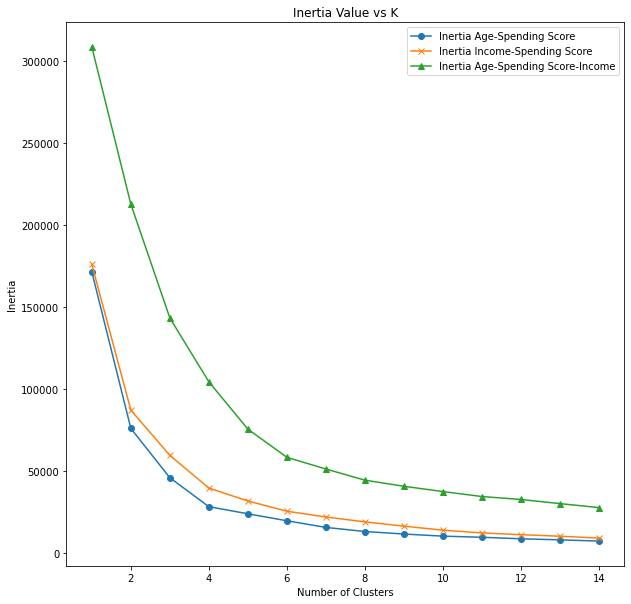

In [21]:
plt.figure(figsize=(10, 10))




X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia1 = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia1.append(algorithm.inertia_)
    
    
X2 = df[['Age' , 'Annual Income (k$)']].iloc[: , :].values
inertia2 = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia2.append(algorithm.inertia_)
    
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia3 = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia3.append(algorithm.inertia_)


plt.plot(np.arange(1 , 15) , inertia1 , marker= 'o')
plt.plot(np.arange(1 , 15) , inertia2 , marker='x')
plt.plot(np.arange(1 , 15) , inertia3 , marker='^')

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.legend(['Inertia Age-Spending Score', 'Inertia Income-Spending Score', 'Inertia Age-Spending Score-Income'])
plt.title("Inertia Value vs K")
plt.show()    






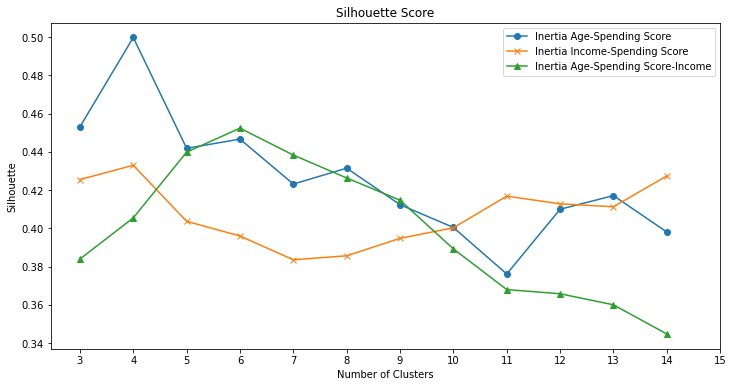

In [22]:
from sklearn.metrics import silhouette_score

plt.figure(figsize=(12, 6))

sil1 = []
for n in range(3 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    sil1.append(silhouette_score(X1, algorithm.labels_))
    
    
sil2 = []
for n in range(3 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    sil2.append(silhouette_score(X2, algorithm.labels_))


X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
sil3 = []
for n in range(3 , 15):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    sil3.append(silhouette_score(X3, algorithm.labels_))



plt.plot(np.arange(3 , 15) , sil1 , marker= 'o')
plt.plot(np.arange(3 , 15) , sil2 , marker='x')
plt.plot(np.arange(3 , 15) , sil3 , marker='^')


plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette')
plt.xticks(np.arange(3,16))

plt.legend(['Inertia Age-Spending Score', 'Inertia Income-Spending Score', 'Inertia Age-Spending Score-Income'])
plt.title("Silhouette Score")
plt.show()    



In [23]:
#Thus for Age-Spending and Income the best Number of Clusters 6

algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age Range  cluster  
0     18-30        4  
1     18-30        5  
2     18-30        4  
3     18-30        5  
4     30-45        4

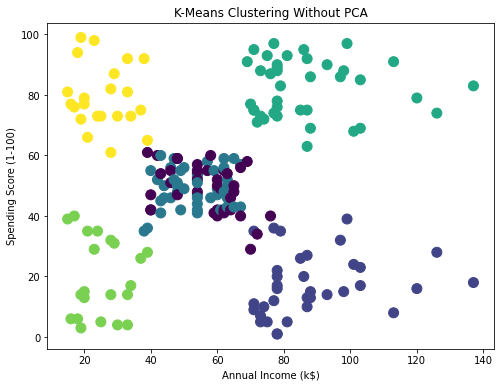

In [24]:
plt.figure(1 , figsize = (8 , 6) )
plt.clf()

plt.scatter(x = 'Annual Income (k$)', 
            y = 'Spending Score (1-100)', 
            data = df, 
            c = 'cluster', 
            s = 100)
plt.ylabel('Spending Score (1-100)') 
plt.xlabel('Annual Income (k$)')
plt.title("K-Means Clustering Without PCA")
plt.show()


import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
                  color= df['cluster'],
                  width= 8
                  ),
        opacity=0.7
                )
)
data = [trace1]
layout = go.Layout(
    title= {
        'text': "K-Means Clustering without PCA (using Age, Income and Spending Score)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=700,
    height=700
)



fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## 1. K-Means

    b. Applying PCA


In [25]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principaldf = pd.DataFrame(X_principal)
X_principaldf.columns = ['P1', 'P2']
X_principaldf.head()

P1        P2
0 -0.358146 -0.808495
1 -0.634308 -0.729439
2 -0.030129 -0.656543
3 -0.594864 -0.763586
4 -0.067077 -0.936304

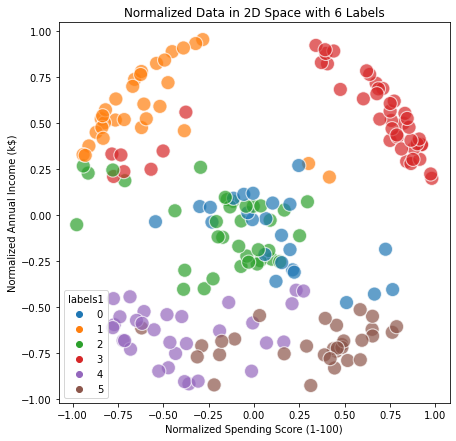

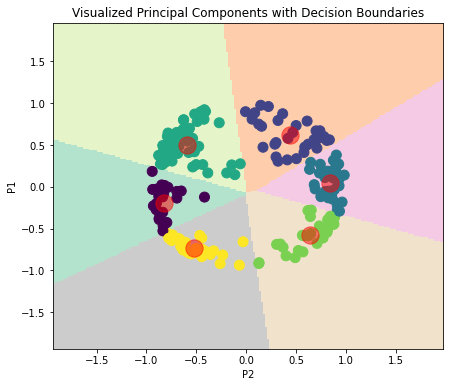

In [26]:
# Visualizing Normalized Data in 2 D Space
algorithm = (KMeans(n_clusters = 6, 
                    init='k-means++', 
                    n_init = 10, 
                    max_iter=300, 
                    tol=0.0001, 
                    random_state= 111 , 
                    algorithm='elkan'))
algorithm.fit(X_principal)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

X_normalized["labels1"]=labels1


plt.figure(1 , figsize = (7 , 7) )



sns.scatterplot(data=X_normalized, 
                x="Spending Score (1-100)",
                y="Annual Income (k$)", 
                hue="labels1", 
                palette="tab10", 
                s=200, alpha=0.7)

plt.ylabel('Normalized Annual Income (k$)') , plt.xlabel('Normalized Spending Score (1-100)')
plt.title("Normalized Data in 2D Space with 6 Labels")
plt.show()


X = X_principaldf.iloc[: , :].values


algorithm = (KMeans(n_clusters = 6 ,
                    init='k-means++', 
                    n_init = 10 ,
                    max_iter=300, 
                    tol=0.0001,  
                    random_state= 111  , 
                    algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (7 , 6) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , 
           interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'P1', 
            y = 'P2', 
            data = X_principaldf, 
            c = labels1, 
            s = 100)
plt.scatter(x = centroids1[: , 0] , 
            y =  centroids1[: , 1] , 
            s = 300 , 
            c = 'red' , 
            alpha = 0.5)
plt.ylabel('P1') 
plt.xlabel('P2')
plt.title("Visualized Principal Components with Decision Boundaries")
plt.show()


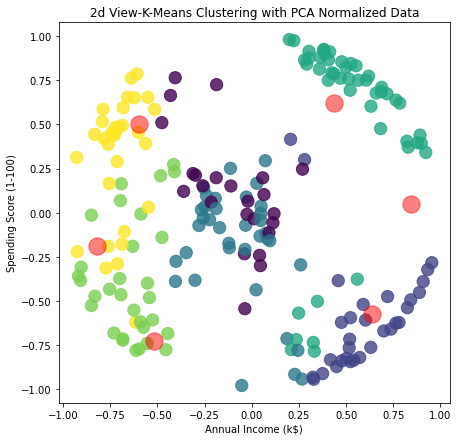

In [27]:
# Visualizing Clusering Labels on PCAed Data

plt.figure(1 , figsize = (7 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)

plt.scatter(x = 'Annual Income (k$)', 
            y = 'Spending Score (1-100)', 
            data = X_normalized, 
            c = labels1, 
            s = 150, alpha=0.8)
plt.scatter(x = centroids1[: , 0] , 
            y =  centroids1[: , 1] , 
            s = 300 , 
            c = 'red' , 
            alpha = 0.5)
plt.ylabel('Spending Score (1-100)') 
plt.xlabel('Annual Income (k$)')
plt.title("2d View-K-Means Clustering with PCA Normalized Data")
plt.show()

X_normalized_PCA=X_normalized

X_normalized_PCA["label"]=labels1
#X_normalized_PCA

import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= X_normalized_PCA['Age'],
    y= X_normalized_PCA['Spending Score (1-100)'],
    z= X_normalized_PCA['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = X_normalized_PCA['label'], 
        size= 10,
        line=dict(
                  color= X_normalized_PCA['label'],
                  width= 8
                  ),
        opacity=0.7
                )
)
data = [trace1]
layout = go.Layout(
    title= {
        'text': "K-Means with PCA (using Age, Income and Spending Score, Normalized Data)",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=700,
    height=700
)



fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

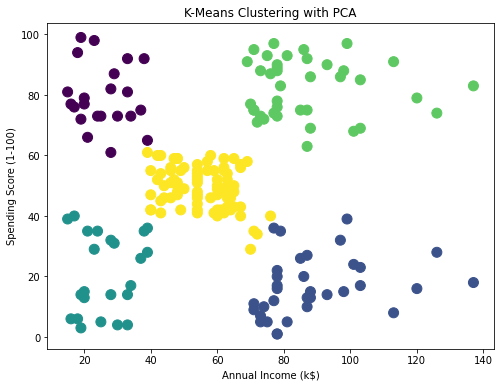

In [28]:
XX = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(XX)
X_principaldf = pd.DataFrame(X_principal)
X_principaldf.columns = ['P1', 'P2']
X_principaldf.head()

X = X_principaldf.iloc[: , :].values


algorithm = (KMeans(n_clusters = 5 ,
                    init='k-means++', 
                    n_init = 10 ,
                    max_iter=300, 
                    tol=0.0001,  
                    random_state= 111  , 
                    algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
centroids1
XX2=df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']]

XX2["label"]=labels1


plt.figure(1 , figsize = (8 , 6) )

plt.scatter(x = 'Annual Income (k$)', 
            y = 'Spending Score (1-100)', 
            data = XX2, 
            c = 'label', 
            s = 100)
plt.ylabel('Spending Score (1-100)') 
plt.xlabel('Annual Income (k$)')
plt.title("K-Means Clustering with PCA")
plt.show()




import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= XX2['Age'],
    y= XX2['Spending Score (1-100)'],
    z= XX2['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = XX2['label'], 
        size= 10,
        line=dict(
                  color= XX2['label'],
                  width= 8
                  ),
        opacity=0.7
                )
)
data = [trace1]
layout = go.Layout(
    title= {
        'text': "K-Means Clustering with PCA (using Age, Income and Spending Score)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=700,
    height=700
)



fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## 2. DBSCAN Clustering

### a. Without PCA

In [29]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing

import matplotlib
colors=['grey','red','blue','green', 'purple']

label_encoder = preprocessing.LabelEncoder() 

df['Gender Encoded'] = label_encoder.fit_transform(df['Gender'])

df['Age Range Encoded'] = label_encoder.fit_transform(df['Age Range'])


X_DB = StandardScaler().fit_transform(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])

In [30]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(X_DB)

DBSCAN()

In [31]:
df['DBSCAN_labels_tuned_noPCA']=dbscan.labels_ 
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

    Age Range  cluster  Gender Encoded  Age Range Encoded  \
0       18-30        4               1                  0   
1       18-30        5               1                  0   
2       18-30        4               0                  0   
3       18-30        5               0                  0   
4       30-45        4               0                  1   
..        ...      ...             ...                ...   
195     30-45        3               0                  1   
196     45-60        1               0                  2   
197     30-45        3               1                  1   
198     30-45        1               1                  1   
199     30-45        3               1                  1   

     DBSCAN_labels_tuned_noPCA  
0                           -1  
1                            0  
2                           -1  
3                            0  
4                           -1  
..                         ...  
195                         -1  
196                         -1  
197                         -1  
198                         -1  
199                         -1  

[200 rows x 10 columns]

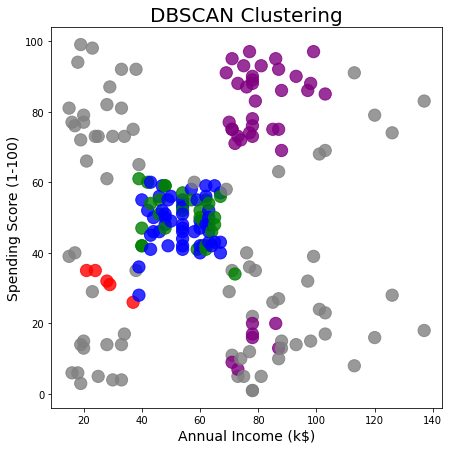

In [32]:
# Plotting resulting clusters
plt.figure(figsize=(7,7))
plt.scatter(df["Annual Income (k$)"],
            df["Spending Score (1-100)"],
            c=df['DBSCAN_labels_tuned_noPCA'],
            cmap=matplotlib.colors.ListedColormap(colors),s=150, alpha=0.8)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.show()

# Everything is being considered noise

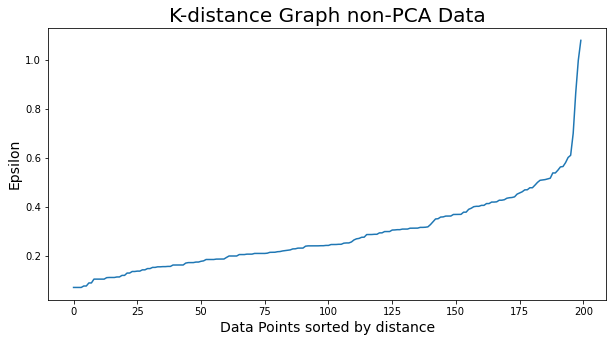

In [33]:
#trying to find the best value of epsilon

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X_DB)

distances, indices = nbrs.kneighbors(X_DB)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph non-PCA Data',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [34]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.61,min_samples=8)
dbscan_opt.fit(X_DB)

DBSCAN(eps=0.61, min_samples=8)

In [35]:
df['DBSCAN_opt_labels_noPCA']=dbscan_opt.labels_
df['DBSCAN_opt_labels_noPCA'].value_counts()

#52 out of 200 points are classified as noise

-1    52
 1    52
 0    50
 2    34
 3    12
Name: DBSCAN_opt_labels_noPCA, dtype: int64

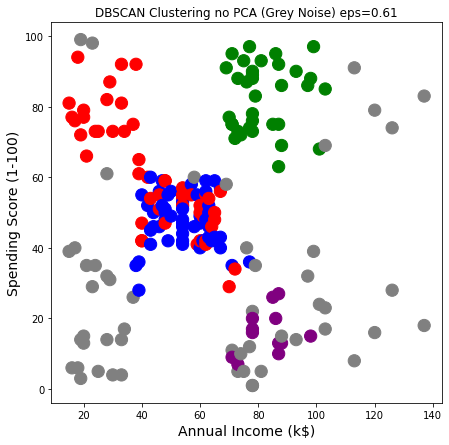

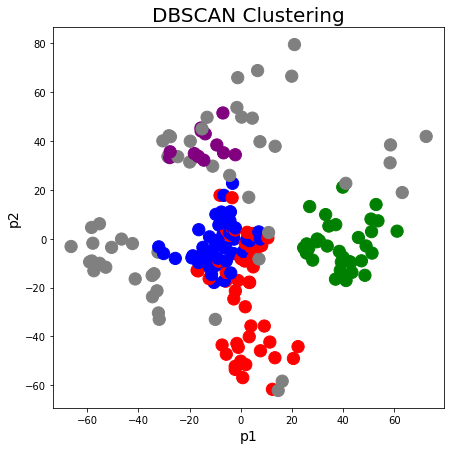

In [36]:
# Plotting the resulting clusters
plt.figure(figsize=(7,7))
plt.scatter(df["Annual Income (k$)"],
            df["Spending Score (1-100)"],
            c=df['DBSCAN_opt_labels_noPCA'],
            cmap=matplotlib.colors.ListedColormap(colors),s=150)
plt.title('DBSCAN Clustering no PCA (Grey Noise) eps=0.61',fontsize=12)
plt.xlabel("Annual Income (k$)",fontsize=14)
plt.ylabel("Spending Score (1-100)",fontsize=14)
plt.show()

#grey points are noise

X_principaldf['DBSCAN_opt_labels_noPCA']=dbscan_opt.labels_
X_principaldf['DBSCAN_opt_labels_noPCA'].value_counts()

# Plotting the resulting clusters
plt.figure(figsize=(7,7))
plt.scatter(X_principaldf["P1"],
            X_principaldf["P2"],
            c=X_principaldf['DBSCAN_opt_labels_noPCA'],
            cmap=matplotlib.colors.ListedColormap(colors),s=150)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel("p1",fontsize=14)
plt.ylabel("p2",fontsize=14)
plt.show()

In [37]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = df['DBSCAN_opt_labels_noPCA'], 
        colorscale="magma",
        size= 10,
        line=dict(
                  color= df['DBSCAN_opt_labels_noPCA'],
                  width= 8
                  ),
        opacity=0.7
                )
)
data = [trace1]
layout = go.Layout(
    title= {
        'text': "DBSCAN no PCA (Black=Noise)",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=700,
    height=700
)



fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [38]:
# DBSCAN Trying to get close to 6 clusters through trial and error

db = DBSCAN(eps=0.5, min_samples=4).fit(X_DB)


In [39]:


unique_labels = set(labels)  # identifying all the unique labels/clusters

L = db.labels_
df["db_label"]=L

L

array([-1,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1,  2,  0, -1,  0,  1,
        0, -1, -1,  1,  0, -1,  0,  2,  0,  1, -1,  1,  0, -1,  0,  2,  0,
        2,  0, -1,  0,  1,  0, -1,  0,  3,  3,  3,  0,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3, -1,  4,  3,  4,  3,  4, -1,  4,  6,  4,  3,  4,  5,  4,
        6,  4,  5,  4, -1,  4,  3,  4,  5,  4, -1,  4, -1,  4,  6,  4,  6,
        4,  6,  4, -1,  4, -1,  4, -1,  4,  5,  4, -1,  4,  6,  4,  7,  4,
        6,  4,  6,  4, -1,  4, -1,  4, -1,  4,  7,  4, -1,  4,  7,  4, -1,
       -1, -1,  4,  7, -1, -1,  4, -1, -1, -1, -1, -1, -1])

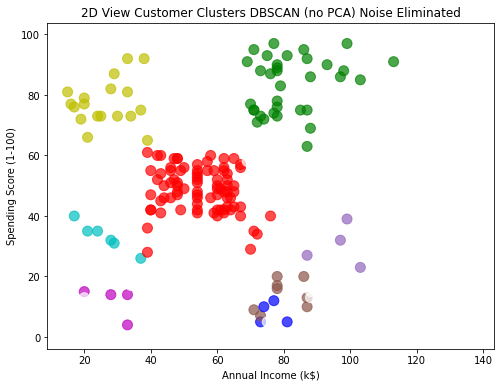

In [40]:
plt.figure(1 , figsize = (8 , 6) )

categories = np.array(df["db_label"])

colormap = np.array(['y','c','m','r', 'g', 'b',"tab:brown","tab:purple", 'w'])



plt.scatter(x = 'Annual Income (k$)', 
            y = 'Spending Score (1-100)', 
            data = df, 
            alpha=0.7,
            s = 100,
           color=colormap[categories])
plt.ylabel('Spending Score (1-100)') 
plt.xlabel('Annual Income (k$)')
plt.title('2D View Customer Clusters DBSCAN (no PCA) Noise Eliminated')
plt.show()




import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = df['db_label'], 
        colorscale="plasma",
        size= 10,
        line=dict(
                  color= df['db_label'],
                  width= 8
                  ),
        opacity=0.7
                )
)
data = [trace1]
layout = go.Layout(
    title= {
        'text': "DBSCAN without PCA (using Age, Income and Spending Score)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=700,
    height=700
)



fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


### b. With PCA


In [41]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized[["Age","Annual Income (k$)","Spending Score (1-100)"]])
X_principaldf = pd.DataFrame(X_principal)
X_principaldf.columns = ['P1', 'P2']
X_principaldf.head()

P1        P2
0 -0.358146 -0.808495
1 -0.634308 -0.729439
2 -0.030129 -0.656543
3 -0.594864 -0.763586
4 -0.067077 -0.936304

In [42]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X_principal)

distances, indices = nbrs.kneighbors(X_principal)

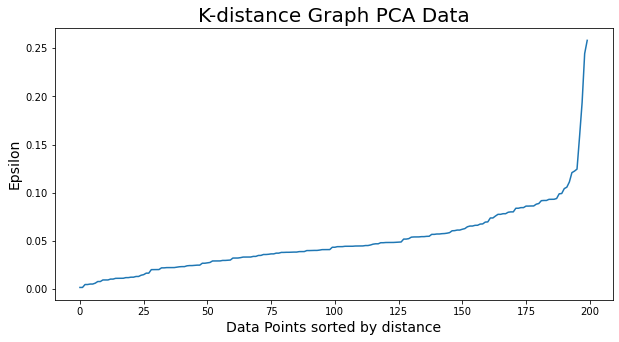

In [43]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph PCA Data',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [44]:
# from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.12,min_samples=3)
dbscan_opt.fit(X_principal)

DBSCAN(eps=0.12, min_samples=3)

In [45]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 2     51
 0     49
 7     38
 5     15
-1     15
 1      7
 10     7
 3      4
 6      4
 8      4
 4      3
 9      3
Name: DBSCAN_opt_labels, dtype: int64

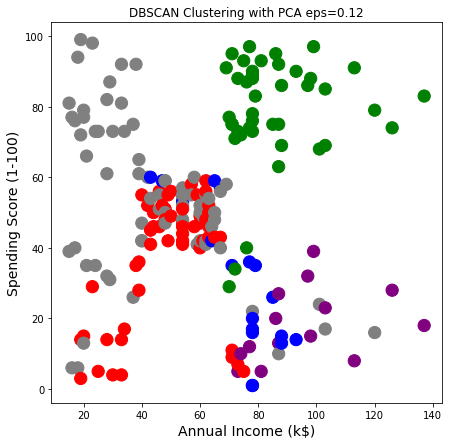

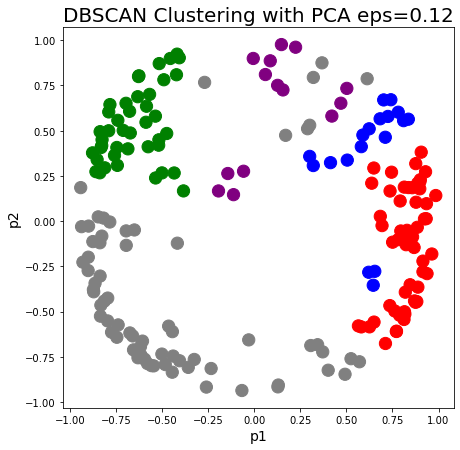

In [46]:
# Plotting the resulting clusters
plt.figure(figsize=(7,7))
plt.scatter(df["Annual Income (k$)"],
            df["Spending Score (1-100)"],
            c=df['DBSCAN_opt_labels'],
            cmap=matplotlib.colors.ListedColormap(colors),s=150)
plt.title('DBSCAN Clustering with PCA eps=0.12',fontsize=12)
plt.xlabel("Annual Income (k$)",fontsize=14)
plt.ylabel("Spending Score (1-100)",fontsize=14)
plt.show()



X_principaldf['DBSCAN_opt_labels']=dbscan_opt.labels_
X_principaldf['DBSCAN_opt_labels'].value_counts()

# Plotting the resulting clusters
plt.figure(figsize=(7,7))
plt.scatter(X_principaldf["P1"],
            X_principaldf["P2"],
            c=X_principaldf['DBSCAN_opt_labels'],
            cmap=matplotlib.colors.ListedColormap(colors),s=150)
plt.title('DBSCAN Clustering with PCA eps=0.12',fontsize=20)
plt.xlabel("p1",fontsize=14)
plt.ylabel("p2",fontsize=14)
plt.show()

import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = df['DBSCAN_opt_labels'], 
        colorscale="magma",
        size= 10,
        line=dict(
                  color= df['DBSCAN_opt_labels'],
                  width= 8
                  ),
        opacity=0.8
                )
)
data = [trace1]
layout = go.Layout(
    title= {
        'text': "DBSCAN with PCA (Black=Noise)",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=700,
    height=700
)



fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [47]:

db = DBSCAN(eps = 0.172, min_samples = 3).fit(X_principal)

labels = db.labels_

df["db_label"]=labels

labels



array([ 0,  0, -1,  0, -1,  0,  1,  0,  2,  0,  2,  0,  2,  0,  1,  0, -1,
        0,  2,  0, -1,  0,  2,  0,  2,  0,  1,  0,  1,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  1,  0,  2,  0,  2,  0,  2,  0,  2,  0,  0,  0,  2,
        0,  0,  2,  2,  2,  2,  2,  0,  2,  2,  0,  2,  2,  2,  0,  1,  2,
        0,  0,  2,  2,  2,  2,  2,  0,  2,  1,  0,  2,  2,  0,  2,  2,  0,
        2,  2,  0,  0,  2,  2,  0,  2,  2, -1,  0,  2,  0,  2,  0,  0,  2,
        2,  0,  2,  0,  2,  2,  2,  2,  2,  0,  2,  0,  0,  0,  2,  2,  2,
        2,  3,  2,  3,  3,  3,  3,  2,  3,  2,  3,  2,  3,  3,  3,  4,  3,
        2,  3,  4,  3,  2,  3,  3,  3,  4,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  4,  3,  2,  3,  2,  3,  5,  3,
        2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  5,  3,  2,  3,  5,  3,  2,
        3,  5,  3,  5,  3,  5,  3,  5,  3,  5,  3,  5,  3])

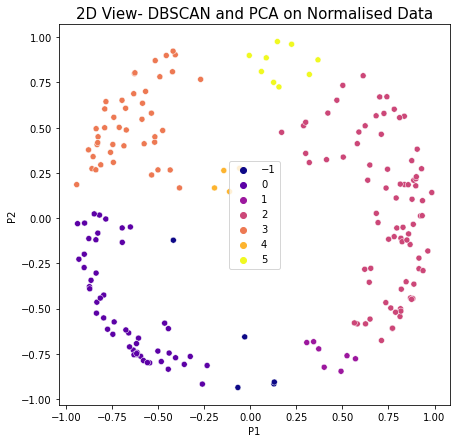

In [48]:
plt.figure(figsize =(7, 7))

sns.scatterplot(x=X_principaldf['P1'], y= X_principaldf['P2'], hue=labels, palette="plasma")

plt.title('2D View- DBSCAN and PCA on Normalised Data', fontsize = 15)
plt.show()

X_normalized_PCA_DB=X_normalized

X_normalized_PCA_DB["label"]=labels


import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= X_normalized_PCA_DB['Age'],
    y= X_normalized_PCA_DB['Spending Score (1-100)'],
    z= X_normalized_PCA_DB['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = X_normalized_PCA_DB['label'], 
        colorscale="plasma",
        size= 12,
        line=dict(
                  color= X_normalized_PCA_DB['label'],
                  width= 8
                  ),
        opacity=0.7
                )
)
data = [trace1]
layout = go.Layout(
    title= {
        'text': "DBSCAN with PCA (using Age, Income and Spending Score, Normalized Data)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=700,
    height=700
)


fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


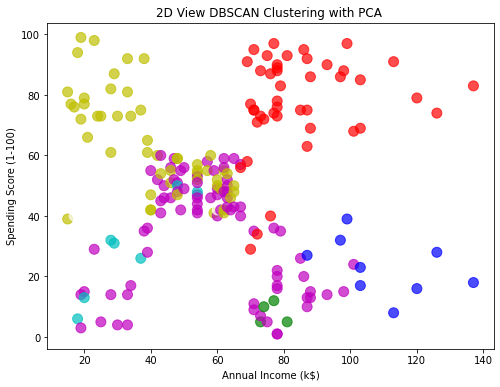

In [49]:
plt.figure(1 , figsize = (8 , 6) )


categories = np.array(df["db_label"])

colormap = np.array(['y','c','m','r', 'g', 'b',"tab:brown","tab:purple", 'w'])




plt.scatter(x = 'Annual Income (k$)', 
            y = 'Spending Score (1-100)', 
            data = df, 
            color = colormap[categories], 
            s = 100, 
            alpha=0.7)

plt.ylabel('Spending Score (1-100)') 
plt.xlabel('Annual Income (k$)')
plt.title("2D View DBSCAN Clustering with PCA ")
plt.show()




import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = df['db_label'], 
        colorscale="plasma",
        size= 10,
        line=dict(
                  color= df['db_label'],
                  width= 8
                  ),
        opacity=0.7
                )
)
data = [trace1]
layout = go.Layout(
    title= {
        'text': "DBSCAN Clustering with PCA (using Age, Income and Spending Score)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=700,
    height=700
)



fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)